In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from psf import *
from resampling import FluxConservingResampler

In [4]:
# Generate some random numbers to mimic flux

wave_edges = np.linspace(6000, 9000, 3001)
wave = 0.5 * (wave_edges[1:] + wave_edges[:-1])
flux = np.random.normal(size=wave.size)

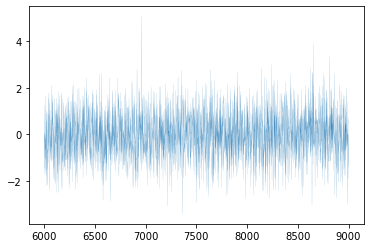

In [5]:
plt.plot(wave, flux, '-', lw=0.1)

In [6]:
# Sigma of Gauss PSF changes linearly with wavelength

swave = np.linspace(5000, 10000, 10)
sigma = np.linspace(5, 10, 10)

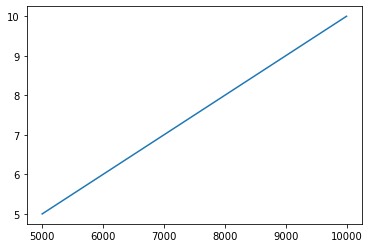

In [7]:
plt.plot(swave, sigma)

In [8]:
# Convert the Gauss kernels to PCA representation

gauss = GaussPsf(swave, sigma=sigma)
pca = PcaPsf.from_psf(gauss, wave)

In [9]:
# Convolve "spectrum" using the pca representation

cwave, cflux, _, _ = pca.convolve(wave, flux)
cflux.shape

(2996,)

(8200, 8500)

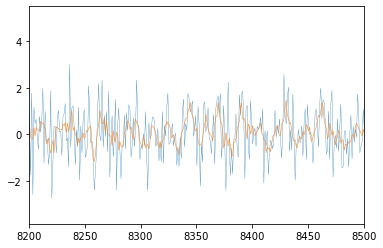

In [10]:
plt.plot(wave, flux, '-', lw=0.3)
plt.plot(cwave, cflux, '-', lw=0.5)
plt.xlim(8200, 8500)

In [12]:
rwave = np.linspace(8210, 8450, 150)

res = FluxConservingResampler()
rflux, _ = res.resample_value(cwave, None, cflux, target_wave=rwave)

(8200, 8500)

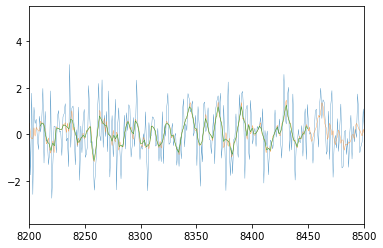

In [13]:
plt.plot(wave, flux, '-', lw=0.3)
plt.plot(cwave, cflux, '-', lw=0.3)
plt.plot(rwave, rflux, '-', lw=0.5)
plt.xlim(8200, 8500)